In [33]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/mobile_phone.csv')
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


In [34]:
from datetime import datetime
import time

In [35]:
#create_date -unix time FUNCTION CREATE 

In [36]:
def change_unixtime(str_date):
    timestamp =  time.mktime(datetime.strptime(str_date,'%Y-%m-%d').timetuple() )
    return timestamp

In [37]:
df['create_date'][0][:10]

'2017-03-19'

In [38]:
change_unixtime(df['create_date'][0][:10])

1489849200.0

In [39]:
df['create_date_unixtime'] = df['create_date'].apply(lambda x :change_unixtime(x[:10]) )
df['create_date_unixtime'][:6]

0    1.489849e+09
1    1.477408e+09
2    1.477321e+09
3    1.490195e+09
4    1.460300e+09
5    1.490108e+09
Name: create_date_unixtime, dtype: float64

In [40]:
# min-max scaling  - std
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
# sklearn.preprocessing.MinMaxScaler

# (각 요소 - 평균) / (최대값 - 최소값)
df['create_unixtime_scale'] = (df['create_date_unixtime'] - df['create_date_unixtime'].min()) / \
        (df['create_date_unixtime'].max() - df['create_date_unixtime'].min())
df[['create_date','create_date_unixtime','create_unixtime_scale']].head()  


,create_date,create_date_unixtime,create_unixtime_scale
0,2017-03-19 4 35 00 PM,1.489849e+09,0.985612
1,2016-10-26 12 08 00 PM,1.477408e+09,0.640288
2,2016-10-25 12 52 00 PM,1.477321e+09,0.637890
3,2017-03-23 11 14 00 PM,1.490195e+09,0.995204
4,2016-04-11 7 35 00 PM,1.460300e+09,0.165468


In [41]:
# phone model 을 분리
df['phone_model_st'] =  df['phone_model'].apply(lambda x : x.split(" ")[-1])
df['phone_model_detail'] = df['phone_model'].apply(lambda x : ' '.join( x.split(" ")[:-1]))
df[['phone_model_st','phone_model_detail']].head()

,phone_model_st,phone_model_detail
0,64gb,iphone 6
1,32gb,galaxy s6 edge
2,32gb,galaxy s6
3,32gb,lg g5
4,32gb,lg u


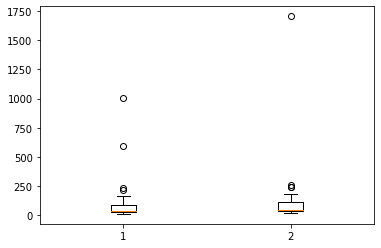

In [42]:
# 모델별 거래
model_counts =  df['phone_model'].value_counts()
model_detail_counts =  df['phone_model_detail'].value_counts()

temp = [model_counts, model_detail_counts]
# 두 피처간의 기종별 거래 데이터
import matplotlib.pyplot as plt

plt.boxplot(temp)
plt.show()

In [43]:
# 기종명+용량으로 
model_storage_factory_dic = {}

for index, row in  df.iterrows():
    model_concat =  (row['phone_model_detail'], row['phone_model_st'])
    if model_concat in model_storage_factory_dic:
        pass
    else:
        model_storage_factory_dic[model_concat] = row['factory_price']
str(model_storage_factory_dic)[:50]

"{('iphone 6', '64gb'): 924000, ('galaxy s6 edge', "

In [44]:
# z-score.....  평균으로부터 표준편차의 몇배 만큼 떨어져 있는지를 보여주는 지수
# z = (x - mean) / std
# price z score : 어떤 데이터의 가격이 해당 기종의 평균에 비해 어느정도 높거나 낮은지 알수있게
df['zscore_price'] = df.groupby('phone_model_detail')['price'].transform(lambda x: (x - x.mean()) / x.std())

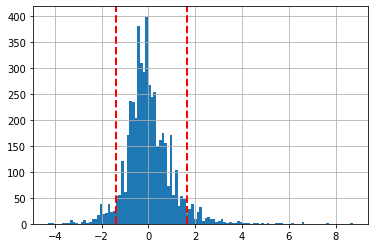

In [45]:
ax = df['zscore_price'].hist(bins='auto')
lower= df['zscore_price'].quantile(0.05)
upper = df['zscore_price'].quantile(0.95)

ax.axvline(x = lower,color = 'r', linestyle='dashed', linewidth=2)
ax.axvline(x = upper,color = 'r', linestyle='dashed', linewidth=2)

plt.show()


In [46]:
def makepricelevel(price, lower, upper):
    if price > upper:
        return 2
    elif price > lower:
        return 1
    else:
        return 0;

In [47]:
lower, upper
df['lower_price'] =  df.groupby('phone_model_detail')['price'].transform(lambda x: x.quantile(0.05))
df['upper_price'] =  df.groupby('phone_model_detail')['price'].transform(lambda x: x.quantile(0.95))
df['price_level'] =  df.apply(lambda x : makepricelevel(x['price'],x['lower_price'],x['upper_price']), axis=1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   create_date            4951 non-null   object 
 1   price                  4951 non-null   float64
 2   text                   4951 non-null   object 
 3   phone_model            4951 non-null   object 
 4   factory_price          4951 non-null   int64  
 5   maker                  4951 non-null   object 
 6   price_index            4951 non-null   float64
 7   create_date_unixtime   4951 non-null   float64
 8   create_unixtime_scale  4951 non-null   float64
 9   phone_model_st         4951 non-null   object 
 10  phone_model_detail     4951 non-null   object 
 11  zscore_price           4951 non-null   float64
 12  lower_price            4951 non-null   float64
 13  upper_price            4951 non-null   float64
 14  price_level            4951 non-null   int64  
dtypes: f

In [50]:
# price lower_price upper_price price_level text    
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,create_date_unixtime,create_unixtime_scale,phone_model_st,phone_model_detail,zscore_price,lower_price,upper_price,price_level
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,1.489849e+09,0.985612,64gb,iphone 6,0.910563,180000.0,680000.0,1
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477408e+09,0.640288,32gb,galaxy s6 edge,1.003699,180000.0,414000.0,1
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,1.477321e+09,0.637890,32gb,galaxy s6,0.669017,150000.0,349000.0,1
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,1.490195e+09,0.995204,32gb,lg g5,-0.330426,100000.0,500000.0,1
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,1.460300e+09,0.165468,32gb,lg u,1.014392,18000.0,400000.0,1


In [51]:
# Text 데이터 사용하기
# 한글데이터 처리...

In [53]:
df['text'][100]

'갤럭시 s3 3g 16g 3만원 팝니다  skt 모델입니다 초기 구성품 거의 있습니다순정 이어폰은 어디갔는지 모르겠네요모니터 성능에 따라 안 보일 수도 있습니다전면부 카메라 아래 쪽 액정 금가있습니다마찬가지로액정부 중앙 우측에서부터 홈버튼 위까지 금 있습니다우측 하단부 찍힘 자국 있습니다정상작동합니다연락주세요칠칠'

In [54]:
# 불용어 https://www.ranks.nl/stopwords/korean

In [55]:
import pickle
import re

In [56]:
!pip install konlpy

In [57]:
from konlpy.tag import Okt

In [58]:
with open('stopwords.pkl', 'rb') as f:
    swords =  pickle.load(f)

In [107]:
swords[:10]
    

['거래', '입니', '판매', '아이폰', '갤럭시', '골드', '팝', '만원', '폰', '시']

In [97]:
# 특수문자를 제거, 숫자형태의 문자
# df['text'][0].replace('[^ㄱ-ㅎㅏ-ㅣ|가-힣]','')
# re.compile('[^ㄱ-ㅎㅏ-ㅣ|가-힣]').findall(df['text'][0])
temp = df['text'][100]
temp = ''.join(re.compile('[ㄱ-ㅎㅏ-ㅣ|가-힣]').findall(temp))
temp


'갤럭시만원팝니다모델입니다초기구성품거의있습니다순정이어폰은어디갔는지모르겠네요모니터성능에따라안보일수도있습니다전면부카메라아래쪽액정금가있습니다마찬가지로액정부중앙우측에서부터홈버튼위까지금있습니다우측하단부찍힘자국있습니다정상작동합니다연락주세요칠칠'

In [112]:
# 형태소 분류하는 함수를 통해 단어를 추출
okt =  Okt()
okt.pos(temp)
' '.join([i[0] for i in okt.pos(temp) if i[1] == 'Noun' and i[0] not in swords])


'모델 초기 성품 거의 순정 이어폰 어디 모니터 성능 전면 부 카메라 아래쪽 액정 금 마찬가지 액 정부 중앙 우측 홈 버튼 금 우측 단부 자국 정상 작동 칠칠'

In [ ]:
def getNoun(x):
    temp = ''.join(re.compile('[ㄱ-ㅎㅏ-ㅣ|가-힣]').findall(x))
    okt =  Okt()
    okt.pos(temp)
    ' '.join([i[0] for i in okt.pos(temp) if i[1] == 'Noun' and i[0] not in swords])


In [ ]:
df['text2'] = df['text'].apply(lambda x : getNoun(x))

In [117]:
len(df)

4951